In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tips

## Read Data

In [3]:
tips = sns.load_dataset("tips")
tips.shape

(244, 7)

In [7]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
tips.sample(20)

total_bill   tip     sex smoker   day    time  size
7         26.88  3.12    Male     No   Sun  Dinner     4
154       19.77  2.00    Male     No   Sun  Dinner     4
162       16.21  2.00  Female     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
101       15.38  3.00  Female    Yes   Fri  Dinner     2
57        26.41  1.50  Female     No   Sat  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
174       16.82  4.00    Male    Yes   Sun  Dinner     2
88        24.71  5.85    Male     No  Thur   Lunch     2
106       20.49  4.06    Male    Yes   Sat  Dinner     2
216       28.15  3.00    Male    Yes   Sat  Dinner     5
118       12.43  1.80  Female     No  Thur   Lunch     2
240       27.18  2.00  Female    Yes   Sat  Dinner     2
19        20.65  3.35    Male     No   Sat  Dinner     3
121       13.42  1.68  Female     No  Thur   Lunch     2
94        22.75  3.25  Female     No   Fri  Dinner     2
68        20.23  2.01    Male     No   Sat  Dinner     2
78        22.76  3.00    Male     No  Thur   Lunch     2
134       18.26  3.25  Female     No  Thur   Lunch     2
98        21.01  3.00    Male    Yes   Fri  Dinner     2

## Count

In [15]:
tips["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

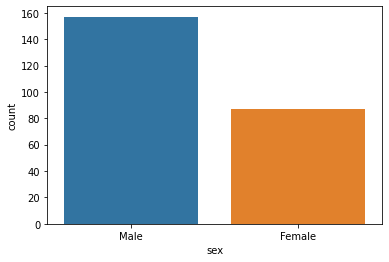

In [11]:
sns.countplot(data=tips, x="sex")

## Scatter plot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

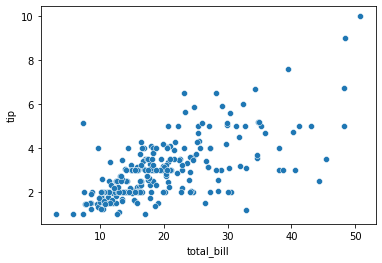

In [17]:
# Total_bill versus the tips
sns.scatterplot(data=tips, x="total_bill", y="tip")

In [19]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

In [20]:
tips["tip_rate"] = (tips["tip"] / tips["total_bill"]) * 100

In [21]:
tips.head()

total_bill   tip     sex smoker  day    time  size   tip_rate
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

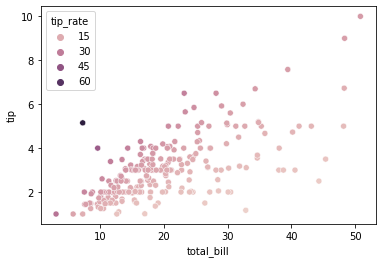

In [22]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="tip_rate")

In [23]:
sns.scatterplot(data=tips, x="total_bill", y="tip_rate")

<AxesSubplot:xlabel='total_bill', ylabel='tip_rate'>

<AxesSubplot:xlabel='tip_rate', ylabel='total_bill'>

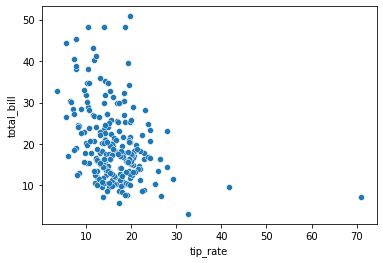

In [24]:
sns.scatterplot(data=tips, x="tip_rate", y="total_bill")

<AxesSubplot:>

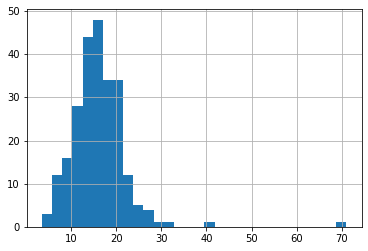

In [26]:
tips["tip_rate"].hist(bins=30)

In [27]:
tips["tip_rate"].mean()

16.08025817225047

In [28]:
tips["tip_rate"].median()

15.476977125802577

In [36]:
p_25 = np.percentile(tips["tip_rate"], 25)
print(p_25)
print(len(tips[tips["tip_rate"]<p_25]))
print(len(tips))
print(len(tips[tips["tip_rate"]<p_25]) / len(tips))

12.912736174309597
61
244
0.25


In [38]:
p_75 = np.percentile(tips["tip_rate"], 75)
print(p_75)
print(len(tips[tips["tip_rate"]<p_75]))
print(len(tips))
print(len(tips[tips["tip_rate"]<p_75]) / len(tips))

19.14754863299875
183
244
0.75


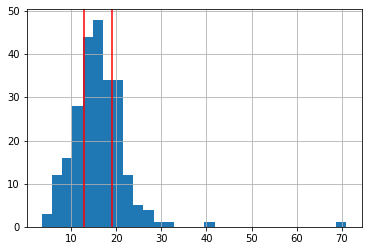

In [41]:
fig, ax = plt.subplots()
tips["tip_rate"].hist(bins=30, ax=ax)
ax.axvline(p_25, c="r")
ax.axvline(p_75, c="r")

In [42]:
tips.head()

total_bill   tip     sex smoker  day    time  size   tip_rate
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765

In [46]:
def get_tip_type(val):
    #p_25 = 12.91; p_75 = 19.14
    if val <= p_25:
        return "Low"
    elif val <=p_75:
        return "Medium"
    else:
        return "High"

tips["tip_type"] = tips["tip_rate"].apply(get_tip_type)

In [50]:
tips.sample(2)

total_bill   tip   sex smoker  day    time  size   tip_rate tip_type
166       20.76  2.24  Male     No  Sun  Dinner     2  10.789981      Low
97        12.03  1.50  Male    Yes  Fri  Dinner     2  12.468828      Low

## Who pays more? Males or females?

In [59]:
gender_to_tip_type = tips.groupby(["sex"])["tip_type"].value_counts().unstack()
print(gender_to_tip_type)

tip_type  High  Low  Medium
sex                        
Male        37   48      72
Female      24   13      50


In [69]:
# P(tip_type | sex)
def conditional_prob(tip_type, sex):
    filtered_by_sex = gender_to_tip_type.loc[sex]
    denominator = filtered_by_sex.sum()
    numerator = filtered_by_sex[tip_type]
    return numerator/denominator

In [74]:
conditional_prob("Medium", "Female")

0.5747126436781609

In [75]:
50/87

0.5747126436781609

## Correlation

<AxesSubplot:>

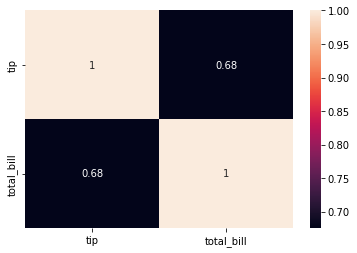

In [118]:
sns.heatmap(tips[["tip", "total_bill"]].corr(), annot=True)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

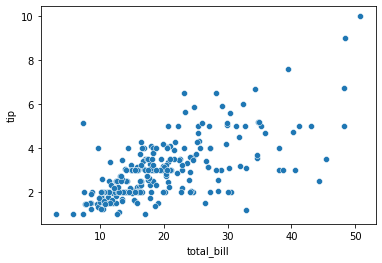

In [119]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

In [120]:
tips["Random"] = np.random.normal(size=len(tips))

In [121]:
tips.head()

total_bill   tip     sex smoker  day    time  size   tip_rate tip_type  \
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673      Low   
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159   Medium   
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734   Medium   
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041   Medium   
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765   Medium   

     Random  
0 -0.881984  
1  0.948332  
2  0.982713  
3  0.233132  
4 -0.056131

<AxesSubplot:>

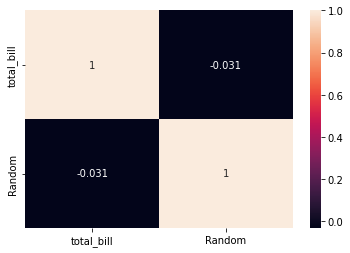

In [123]:
sns.heatmap(tips[["total_bill", "Random"]].corr(), annot=True)

<AxesSubplot:xlabel='total_bill', ylabel='Random'>

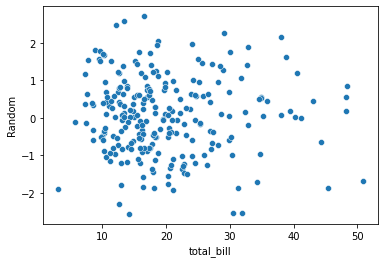

In [124]:
sns.scatterplot(data=tips, x="total_bill", y="Random")

# Cricket

In [84]:
sehwag = pd.read_html("https://stats.espncricinfo.com/ci/engine/player/35263.html?class=2;template=results;type=batting;view=innings")
sehwag = sehwag[3]

In [87]:
sehwag = sehwag[sehwag["Runs"] != "DNB"]
sehwag = sehwag[sehwag["Runs"] != "TDNB"]
sehwag["Runs"] = pd.to_numeric(sehwag["Runs"].apply(lambda row: ''.join(row.split("*"))))

In [111]:
dravid = pd.read_html("https://stats.espncricinfo.com/ci/engine/player/28114.html?class=2;template=results;type=batting;view=innings")[3]
dravid = dravid[dravid["Runs"] != "DNB"]
dravid = dravid[dravid["Runs"] != "TDNB"]
dravid["Runs"] = pd.to_numeric(dravid["Runs"].apply(lambda row: ''.join(row.split("*"))))

In [88]:
sehwag.head()

Runs Mins  BF 4s 6s      SR Pos Dismissal Inns  Unnamed: 9     Opposition  \
0     1    5   2  0  0   50.00   7       lbw    1         NaN     v Pakistan   
2    19   18  24  0  1   79.16   6    caught    1         NaN     v Zimbabwe   
3    58   62  54  8  0  107.40   6    bowled    1         NaN    v Australia   
5     2    7   7  0  0   28.57   6    caught    2         NaN     v Zimbabwe   
6    11   19  16  1  0   68.75   6   not out    2         NaN  v West Indies   

      Ground   Start Date Unnamed: 13  
0     Mohali   1 Apr 1999  ODI # 1427  
2     Rajkot  14 Dec 2000  ODI # 1660  
3  Bengaluru  25 Mar 2001  ODI # 1696  
5   Bulawayo  27 Jun 2001  ODI # 1730  
6   Bulawayo  30 Jun 2001  ODI # 1731

## Mean and Std Deviation

In [113]:
mu_sehwag = sehwag["Runs"].mean()
sigma_sehwag = sehwag["Runs"].std()
print(mu_sehwag)
print(sigma_sehwag)

33.76734693877551
34.80941899427947


In [114]:
mu_dravid = dravid["Runs"].mean()
print(mu_dravid)
sigma_dravid = dravid["Runs"].std()
print(sigma_dravid)
dravid["ZScore"] = (dravid["Runs"] - mu_dravid) / sigma_dravid
# dravid[["Runs", "ZScore"]].head(50)

34.242138364779876
29.681822462366075


## Outlier using Z-Score

In [91]:
sehwag["ZScore"] = (sehwag["Runs"] - mu_sehwag)/sigma_sehwag

In [93]:
sehwag[["Runs", "ZScore"]].head(50)

Runs    ZScore
0      1 -0.941336
2     19 -0.424234
3     58  0.696152
5      2 -0.912608
6     11 -0.654057
7      4 -0.855152
8      2 -0.912608
9      0 -0.970064
10    12 -0.625329
11    33 -0.022044
12    27 -0.194411
13     0 -0.970064
14   100  1.902722
15     4 -0.855152
16     5 -0.826424
17    33 -0.022044
18    55  0.609969
19     4 -0.855152
20    55  0.609969
21    34  0.006684
22    29 -0.136956
23     5 -0.826424
24    51  0.495057
25    82  1.385621
26    42  0.236506
27    31 -0.079500
28    21 -0.366779
29     0 -0.970064
30    32 -0.050772
31    71  1.069614
32    12 -0.625329
33    16 -0.510418
34     0 -0.970064
35    46  0.351418
36    39  0.150323
37    45  0.322690
38    48  0.408874
39   126  2.649646
40    59  0.724880
41    13 -0.596601
42    25 -0.251867
43    28 -0.165684
44     1 -0.941336
45   114  2.304912
46     4 -0.855152
47    52  0.523785
48    18 -0.452962
49    12 -0.625329
50     0 -0.970064
51   108  2.132545

In [94]:
sehwag_z = sehwag[abs(sehwag["ZScore"]) < 2]

In [97]:
print(len(sehwag_z) / len(sehwag))

0.9428571428571428


## Outlier using IQR - Inter quartile range

In [110]:
# print(np.percentile(sehwag["Runs"], 25))
p_25 = sehwag["Runs"].quantile(0.25)
p_75 = sehwag["Runs"].quantile(0.75)
# print(p_25)
# print(p_75)

# Inter quartile range
iqr = p_75 - p_25 
lower = p_25 - 1.5*iqr # left of 25th percentile
upper = p_75 + 1.5*iqr # right of 75th percentile
sehwag_iqr = sehwag[(sehwag["Runs"] > lower) & (sehwag["Runs"] < upper)]
print(100*len(sehwag_iqr)/len(sehwag))

94.28571428571429


In [116]:
p_25 = dravid["Runs"].quantile(0.25)
p_75 = dravid["Runs"].quantile(0.75)
# print(p_25)
# print(p_75)

# Inter quartile range
iqr = p_75 - p_25 # Another way: scipy.stats.iqr(dravid["Runs"])
# print(iqr)
lower = p_25 - 1.5*iqr
upper = p_75 + 1.5*iqr
# print(lower, upper)
dravid_iqr = dravid[(dravid["Runs"] > lower) & (dravid["Runs"] < upper)]
print(100*len(dravid_iqr)/len(dravid))

99.05660377358491


# Height - Weight

In [98]:
wh = pd.read_csv("weight-height.csv")
wh.head(50)

Gender     Height      Weight
0    Male  73.847017  241.893563
1    Male  68.781904  162.310473
2    Male  74.110105  212.740856
3    Male  71.730978  220.042470
4    Male  69.881796  206.349801
5    Male  67.253016  152.212156
6    Male  68.785081  183.927889
7    Male  68.348516  167.971110
8    Male  67.018950  175.929440
9    Male  63.456494  156.399676
10   Male  71.195382  186.604926
11   Male  71.640805  213.741169
12   Male  64.766329  167.127461
13   Male  69.283070  189.446181
14   Male  69.243732  186.434168
15   Male  67.645620  172.186930
16   Male  72.418317  196.028506
17   Male  63.974326  172.883470
18   Male  69.640060  185.983958
19   Male  67.936005  182.426648
20   Male  67.915050  174.115929
21   Male  69.439440  197.731422
22   Male  66.149132  149.173566
23   Male  75.205974  228.761781
24   Male  67.893196  162.006652
25   Male  68.144033  192.343977
26   Male  69.089631  184.435174
27   Male  72.800844  206.828189
28   Male  67.421242  175.213922
29   Male  68.496415  154.342639
30   Male  68.618111  187.506843
31   Male  74.033808  212.910225
32   Male  71.528216  195.032243
33   Male  69.180161  205.183621
34   Male  69.577202  204.164125
35   Male  70.400929  192.903515
36   Male  69.076171  197.488243
37   Male  67.193523  183.810973
38   Male  65.807316  163.851825
39   Male  64.304188  163.108017
40   Male  67.974336  172.135597
41   Male  72.189426  194.045405
42   Male  65.270346  168.617746
43   Male  66.090177  161.193433
44   Male  67.510322  164.660277
45   Male  70.104786  188.922303
46   Male  68.251836  187.060552
47   Male  72.172709  209.070863
48   Male  69.179858  192.014335
49   Male  72.870360  211.342497

In [99]:
wh["H_Zscore"] = (wh["Height"] - wh["Height"].mean())/wh["Height"].std()
wh["W_Zscore"] = (wh["Weight"] - wh["Weight"].mean())/wh["Weight"].std()

<AxesSubplot:xlabel='Height', ylabel='Count'>

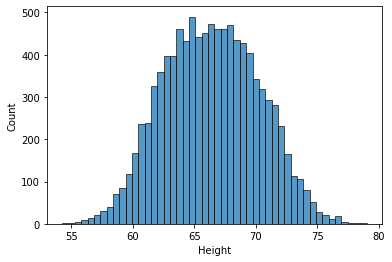

In [100]:
sns.histplot(wh["Height"])

<AxesSubplot:xlabel='H_Zscore', ylabel='Count'>

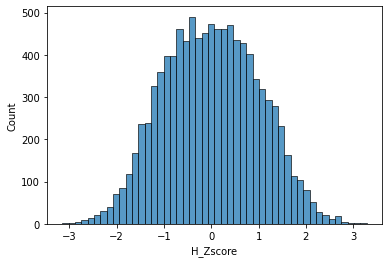

In [101]:
sns.histplot(wh["H_Zscore"])

<AxesSubplot:xlabel='Weight', ylabel='Count'>

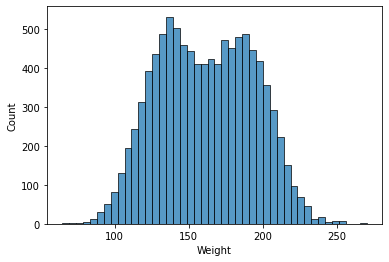

In [102]:
sns.histplot(wh["Weight"])

<AxesSubplot:xlabel='W_Zscore', ylabel='Count'>

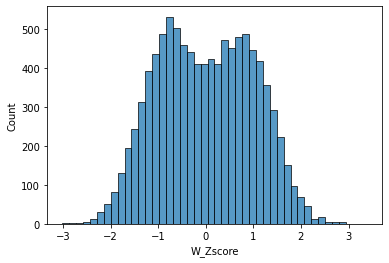

In [103]:
sns.histplot(wh["W_Zscore"])

In [125]:
print(wh["Height"].mean())

66.36755975482124


In [127]:
wh.head(20)

Gender     Height      Weight  H_Zscore  W_Zscore
0    Male  73.847017  241.893563  1.943964  2.505672
1    Male  68.781904  162.310473  0.627505  0.027099
2    Male  74.110105  212.740856  2.012343  1.597726
3    Male  71.730978  220.042470  1.393991  1.825131
4    Male  69.881796  206.349801  0.913375  1.398680
5    Male  67.253016  152.212156  0.230136 -0.287407
6    Male  68.785081  183.927889  0.628331  0.700362
7    Male  68.348516  167.971110  0.514865  0.203397
8    Male  67.018950  175.929440  0.169301  0.451255
9    Male  63.456494  156.399676 -0.756607 -0.156989
10   Male  71.195382  186.604926  1.254786  0.783737
11   Male  71.640805  213.741169  1.370554  1.628881
12   Male  64.766329  167.127461 -0.416171  0.177122
13   Male  69.283070  189.446181  0.757762  0.872226
14   Male  69.243732  186.434168  0.747538  0.778419
15   Male  67.645620  172.186930  0.332177  0.334696
16   Male  72.418317  196.028506  1.572635  1.077229
17   Male  63.974326  172.883470 -0.622019  0.356390
18   Male  69.640060  185.983958  0.850546  0.764397
19   Male  67.936005  182.426648  0.407650  0.653607